# Aleppo Data Loader Validation

---

| **Metadata** | **Value** |
|--------------|-----------|
| **Title** | Aleppo Data Loader Validation |
| **Authors** | Tony Chan & Christopher Risi |
| **Created** | December 2025 |
| **Last Updated** | January 26, 2026 |
| **Dataset** | `Aleppo` |
| **Notebook ID** | `0.02` |
| **Status** | WIP: Aleppo data loader is missing some properties |

---

## Purpose

This notebook validates that the `aleppo_2017` data loader correctly:

1. **Loads data from cache** - Verifies cached data loading works properly
2. **Populates all required properties** - Checks all `DatasetBase` properties are accessible
3. **Provides accurate validation statistics** - Confirms metrics and validation tables are correct
4. **Splits data correctly** - Validates train/validation data splits

## Expected Behavior

- All properties from `DatasetBase` should be accessible
- Cached and non-cached loads should produce identical results  
- Train/validation splits should be properly populated
- All public methods should return valid data

## Prerequisites

- Aleppo dataset downloaded to `cache/data/aleppo_2017/`
- Python environment with required dependencies installed

---

## 1. Setup and Imports

In [1]:
from src.data.diabetes_datasets.data_loader import get_loader
import pandas as pd

pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)

## 2. Load Data (Cached)

In [2]:
loader = get_loader(
    data_source_name="aleppo_2017",
    dataset_type="train",
    use_cached=True,
    parallel=True,
    max_workers=4,
)

2026-01-27T19:24:50 - Initializing AleppoDataLoader with use_cached=True and dataset_type=train
2026-01-27T19:24:50 - Currently not used: dataset_type: train, config: None
2026-01-27T19:24:50 - Raw data for aleppo_2017 already exists in cache
2026-01-27T19:24:50 - Cleaning all patients from /data/home/cjrisi/nocturnal-hypo-gly-prob-forecast/cache/data/aleppo_2017/interim to /data/home/cjrisi/nocturnal-hypo-gly-prob-forecast/cache/data/aleppo_2017/processed with parallel=True and max_workers=4
2026-01-27T19:24:50 - Processing 226 patients in parallel with 4 workers
2026-01-27T19:24:50 - Keeping overlapping data for patient 226
2026-01-27T19:24:50 - ==============================
2026-01-27T19:24:50 - Preprocessing patient 226
2026-01-27T19:24:50 - ==============================
2026-01-27T19:24:50 - Optional columns present: ['msg_type', 'food_g', 'dose_units', 'rate']
2026-01-27T19:24:50 - Keeping overlapping data for patient 124
2026-01-27T19:24:50 - create_physiological_features(): D

## 3. Validate Required Properties

Every data loader should implement these properties from `DatasetBase`:

In [10]:
print(f"Dataset Description: {loader.description}")


Dataset Description: 
                Objective: 'To determine whether the use of continuous glucose monitoring (CGM) without confirmatory
                    blood glucose monitoring (BGM) measurements is as safe and effective as using CGM adjunctive to
                    BGM in adults with well-controlled type 1 diabetes (T1D).'
                Title: 'REPLACE-BG: A Randomized Trial Comparing Continuous Glucose Monitoring With and Without
                    Routine Blood Glucose Monitoring in Adults With Well-Controlled Type 1 Diabetes'
                n = 226 participants.
                    - 149 CGM-only
                    - 77 CGM + BGM (control)
                Paper: https://diabetesjournals.org/care/article-abstract/40/4/538/3687/REPLACE-BG-A-Randomized-Trial-Comparing-Continuous?redirectedFrom=fulltext
                Notes: The Dexcom G4 was used to continuously monitor glucose levels for a span of 6 months.
            


In [4]:
print([attr for attr in dir(loader) if not attr.startswith("_")])

['cache_manager', 'create_validation_table', 'data_shape_summary', 'dataset_config', 'dataset_info', 'dataset_name', 'dataset_type', 'description', 'get_combined_data', 'get_patient_data', 'keep_columns', 'load_data', 'load_raw', 'max_workers', 'num_patients', 'num_validation_days', 'parallel', 'patient_ids', 'processed_data', 'raw_data_path', 'train_data', 'train_data_shape_summary', 'train_percentage', 'use_cached', 'validation_data']


In [5]:
# Property: dataset_name
print(f"Dataset Name: {loader.dataset_name}")
assert loader.dataset_name == "aleppo_2017", "Dataset name mismatch!"

Dataset Name: aleppo_2017


In [6]:
# Property: num_patients
print(f"Number of Patients: {loader.num_patients}")
assert loader.num_patients > 0, "No patients loaded!"

Number of Patients: 0


AssertionError: No patients loaded!

In [7]:
# Property: patient_ids
print(f"Patient IDs: {loader.patient_ids}")
assert len(loader.patient_ids) == loader.num_patients, "Patient ID count mismatch!"

Patient IDs: []


In [8]:
# Property: data_shape_summary
print("Patient Data Shapes:")
for patient_id, shape in loader.data_shape_summary.items():
    print(f"  {patient_id}: {shape}")

Patient Data Shapes:


In [9]:
# Property: dataset_info
print("Dataset Info:")
for key, value in loader.dataset_info.items():
    if isinstance(value, dict) and len(str(value)) > 100:
        print(f"  {key}: <dict with {len(value)} items>")
    else:
        print(f"  {key}: {value}")

Dataset Info:
  dataset_name: aleppo_2017
  num_patients: 0
  patient_ids: []
  train_percentage: 0.9
  parallel: True
  max_workers: 4


## 4. Validate Data Containers

Check that `processed_data`, `train_data`, and `validation_data` are properly populated.

In [ ]:
# Check processed_data
print("Processed Data:")
assert loader.processed_data is not None, "processed_data is None!"
assert isinstance(loader.processed_data, dict), "processed_data should be a dict!"
print(f"  Type: {type(loader.processed_data).__name__}")
print(f"  Number of patients: {len(loader.processed_data)}")

Processed Data:
  Type: dict
  Number of patients: 0


In [ ]:
# Check train_data
print("Train Data:")
assert loader.train_data is not None, "train_data is None!"
assert isinstance(loader.train_data, dict), "train_data should be a dict!"
print(f"  Type: {type(loader.train_data).__name__}")
print(f"  Number of patients: {len(loader.train_data)}")
for patient_id, df in loader.train_data.items():
    print(f"  {patient_id}: {df.shape}")

Train Data:
  Type: dict
  Number of patients: 226
  p40: (57146, 17)
  p205: (66765, 17)
  p108: (56683, 17)
  p252: (48544, 17)
  p18: (62706, 17)
  p17: (61276, 17)
  p50: (55374, 17)
  p215: (58438, 17)
  p118: (47459, 17)
  p140: (56423, 17)
  p86: (46976, 17)
  p127: (54099, 17)
  p128: (39925, 17)
  p89: (40315, 17)
  p60: (63580, 17)
  p37: (50350, 17)
  p38: (56893, 17)
  p170: (54515, 17)
  p272: (61060, 17)
  p138: (24416, 17)
  p235: (40607, 17)
  p137: (62307, 17)
  p96: (54692, 17)
  p70: (69895, 17)
  p284: (47359, 17)
  p189: (63000, 17)
  p186: (37300, 17)
  p27: (53511, 17)
  p160: (58566, 17)
  p58: (51190, 17)
  p57: (50552, 17)
  p110: (37180, 17)
  p245: (67187, 17)
  p148: (54049, 17)
  p147: (55634, 17)
  p47: (44121, 17)
  p48: (61784, 17)
  p157: (51312, 17)
  p158: (62648, 17)
  p10: (47634, 17)
  p91: (53363, 17)
  p130: (73471, 17)
  p232: (62720, 17)
  p77: (75625, 17)
  p78: (50051, 17)
  p20: (51056, 17)
  p181: (35850, 17)
  p283: (56376, 17)
  p167: (3

In [ ]:
# Check validation_data
print("Validation Data:")
assert loader.validation_data is not None, "validation_data is None!"
assert isinstance(loader.validation_data, dict), "validation_data should be a dict!"
print(f"  Type: {type(loader.validation_data).__name__}")
print(f"  Number of patients: {len(loader.validation_data)}")
for patient_id, df in loader.validation_data.items():
    print(f"  {patient_id}: {df.shape}")

Validation Data:
  Type: dict
  Number of patients: 226
  p40: (6337, 17)
  p205: (7489, 17)
  p108: (7201, 17)
  p252: (5473, 17)
  p18: (7201, 17)
  p17: (6913, 17)
  p50: (6625, 17)
  p215: (8065, 17)
  p118: (4609, 17)
  p140: (6625, 17)
  p86: (7777, 17)
  p127: (6625, 17)
  p128: (5473, 17)
  p89: (5185, 17)
  p60: (7201, 17)
  p37: (5185, 17)
  p38: (6337, 17)
  p170: (6337, 17)
  p272: (6913, 17)
  p138: (2881, 17)
  p235: (4692, 17)
  p137: (9505, 17)
  p96: (6625, 17)
  p70: (7489, 17)
  p284: (5268, 17)
  p189: (7777, 17)
  p186: (2388, 17)
  p27: (6049, 17)
  p160: (6913, 17)
  p58: (5761, 17)
  p57: (2881, 17)
  p110: (4116, 17)
  p245: (9217, 17)
  p148: (5761, 17)
  p147: (6913, 17)
  p47: (4897, 17)
  p48: (7201, 17)
  p157: (6337, 17)
  p158: (6996, 17)
  p10: (5473, 17)
  p91: (3745, 17)
  p130: (8353, 17)
  p232: (7201, 17)
  p77: (8929, 17)
  p78: (6049, 17)
  p20: (6625, 17)
  p181: (4897, 17)
  p283: (6337, 17)
  p167: (4404, 17)
  p168: (7201, 17)
  p265: (3457, 

## 5. Validate Public Methods

In [ ]:
# Method: get_patient_data()
sample_patient_id = loader.patient_ids[0]
patient_data = loader.get_patient_data(sample_patient_id)

print(f"get_patient_data('{sample_patient_id}'):")
assert patient_data is not None, "get_patient_data returned None!"
print(f"  Shape: {patient_data.shape}")
print(f"  Columns: {list(patient_data.columns)}")
print(f"  Index type: {type(patient_data.index).__name__}")
print(f"  Date range: {patient_data.index.min()} to {patient_data.index.max()}")

AttributeError: 'AleppoDataLoader' object has no attribute 'patient_ids'

In [ ]:
# Method: get_combined_data()
print("get_combined_data() options:")

combined_all = loader.get_combined_data(data_type="all")
print(f"  data_type='all': {combined_all.shape}")

combined_train = loader.get_combined_data(data_type="train")
print(f"  data_type='train': {combined_train.shape}")

combined_val = loader.get_combined_data(data_type="validation")
print(f"  data_type='validation': {combined_val.shape}")

get_combined_data() options:


AttributeError: 'AleppoDataLoader' object has no attribute 'get_combined_data'

## 6. Validation Statistics

Display comprehensive validation metrics computed by the loader.

In [ ]:
# Data metrics (if available)
if hasattr(loader, "data_metrics") and loader.data_metrics:
    print("Data Metrics:")
    for key, value in loader.data_metrics.items():
        if isinstance(value, float):
            print(f"  {key}: {value:.4f}")
        else:
            print(f"  {key}: {value}")
else:
    print("No data_metrics available.")

No data_metrics available.


In [ ]:
# Create validation table
if hasattr(loader, "create_validation_table"):
    validation_table = loader.create_validation_table()
    print("Validation Table:")
    display(validation_table)
else:
    print("create_validation_table() method not available.")

Validation Table:


,patient_id,num_days,num_data_points,start_date,end_date,date_type,age,sex,avg_bg_mM,min_bg_mM,max_bg_mM,avg_carbs_g,min_carbs_g,max_carbs_g,avg_insulin_units,min_insulin_units,max_insulin_units,num_train_data_points,num_validation_data_points
0,p40,222,63574,2019-12-25 20:45:00,2020-08-24 14:30:00,real,None,None,8.845894,2.16,22.26,0.702868,8.0,198.0,0.158786,0.10,25.0,57146,6337
1,p205,260,74507,2020-01-01 11:10:00,2020-09-16 04:00:00,real,None,None,8.735836,2.16,22.26,0.492386,8.0,120.0,0.058064,0.20,10.7,66765,7489
2,p108,223,63893,2020-01-04 11:20:00,2020-09-09 07:40:00,real,None,None,8.490918,2.61,20.15,0.540558,2.0,110.0,0.096060,0.10,8.5,56683,7201
3,p252,189,54063,2020-01-01 17:35:00,2020-07-15 10:45:00,real,None,None,7.005940,2.16,22.26,0.000000,0.0,0.0,0.045892,0.25,12.5,48544,5473
4,p18,244,69911,2020-01-01 13:25:00,2020-09-21 07:15:00,real,None,None,9.832759,2.16,22.26,0.332373,3.0,97.0,0.049842,0.10,7.4,62706,7201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,p143,229,65621,2020-01-02 11:35:00,2020-09-18 07:55:00,real,None,None,10.751570,2.16,22.26,0.505247,5.0,120.0,0.074055,0.10,15.2,59848,5761
222,p241,235,67492,2019-12-02 01:45:00,2020-08-22 10:00:00,real,None,None,9.367293,2.16,22.26,0.441413,6.0,76.0,0.050967,0.10,7.3,59678,7777
223,p53,249,71434,2020-01-01 12:30:00,2020-09-14 13:15:00,real,None,None,10.699324,2.16,22.26,0.850141,3.0,267.0,0.103993,0.03,10.0,63869,7489
224,p219,233,66868,2019-11-12 16:20:00,2020-09-01 20:35:00,real,None,None,8.873547,2.16,22.26,0.371466,5.0,60.0,0.062348,0.10,10.0,58927,7777


### 6.1 Data Distribution Visualizations

AttributeError: 'AleppoDataLoader' object has no attribute 'get_combined_data'

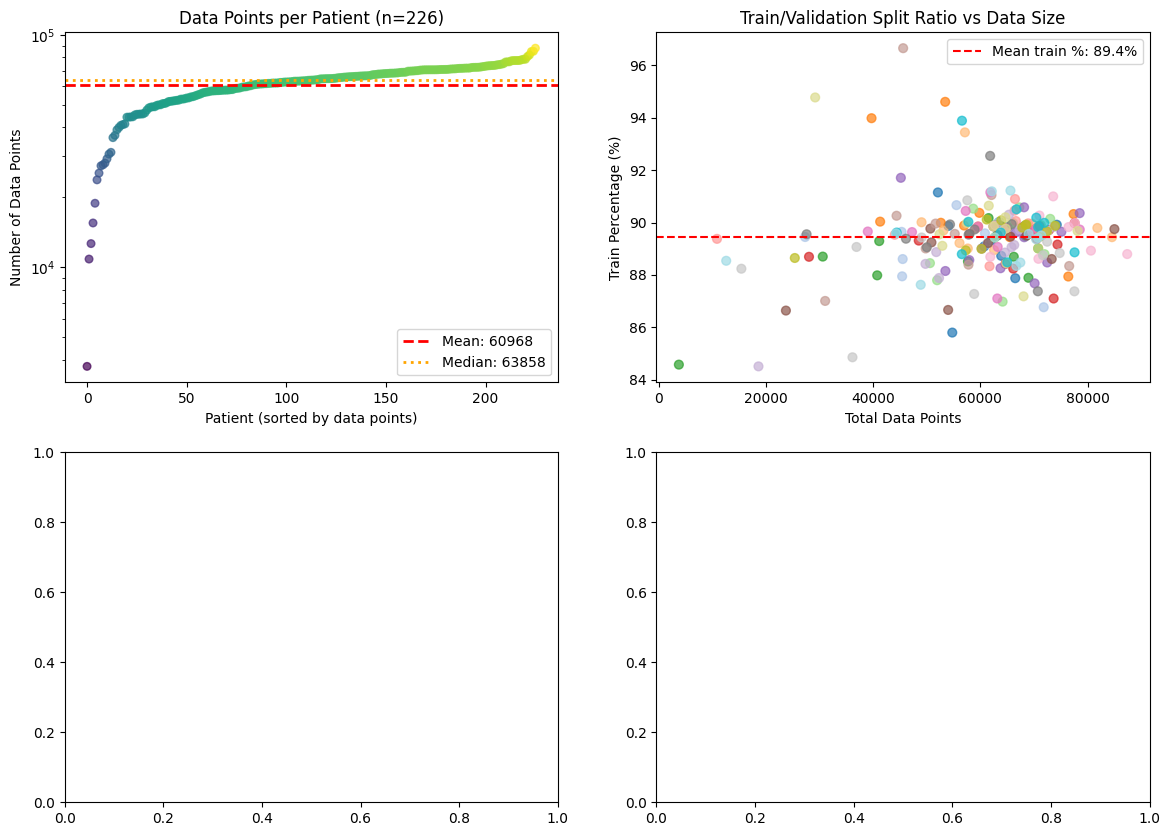

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

patient_ids = list(loader.processed_data.keys())
data_points = [len(df) for df in loader.processed_data.values()]

# Plot 1: Scatter plot of data points per patient (sorted by size)
ax1 = axes[0, 0]
sorted_indices = np.argsort(data_points)
sorted_points = np.array(data_points)[sorted_indices]
ax1.scatter(
    range(len(patient_ids)),
    sorted_points,
    c=sorted_points,
    cmap="viridis",
    s=30,
    alpha=0.7,
)
ax1.axhline(
    y=np.mean(data_points),
    color="red",
    linestyle="--",
    linewidth=2,
    label=f"Mean: {np.mean(data_points):.0f}",
)
ax1.axhline(
    y=np.median(data_points),
    color="orange",
    linestyle=":",
    linewidth=2,
    label=f"Median: {np.median(data_points):.0f}",
)
ax1.set_xlabel("Patient (sorted by data points)")
ax1.set_ylabel("Number of Data Points")
ax1.set_title(f"Data Points per Patient (n={len(patient_ids)})")
ax1.legend()
ax1.set_yscale("log") if max(data_points) / min(data_points) > 10 else None

# Plot 2: Train vs Validation ratio scatter
ax2 = axes[0, 1]
if loader.train_data and loader.validation_data:
    train_points = [len(loader.train_data.get(pid, [])) for pid in patient_ids]
    val_points = [len(loader.validation_data.get(pid, [])) for pid in patient_ids]
    total_points = [t + v for t, v in zip(train_points, val_points)]
    train_ratio = [
        t / tot * 100 if tot > 0 else 0 for t, tot in zip(train_points, total_points)
    ]

    scatter = ax2.scatter(
        total_points,
        train_ratio,
        c=range(len(patient_ids)),
        cmap="tab20",
        s=40,
        alpha=0.7,
    )
    ax2.axhline(
        y=np.mean(train_ratio),
        color="red",
        linestyle="--",
        label=f"Mean train %: {np.mean(train_ratio):.1f}%",
    )
    ax2.set_xlabel("Total Data Points")
    ax2.set_ylabel("Train Percentage (%)")
    ax2.set_title("Train/Validation Split Ratio vs Data Size")
    ax2.legend()
else:
    ax2.text(
        0.5,
        0.5,
        "No train/validation split available",
        ha="center",
        va="center",
        transform=ax2.transAxes,
    )

# Plot 3: Blood glucose distribution (histogram with KDE-style smoothing)
ax3 = axes[1, 0]
combined_data = loader.get_combined_data(data_type="all")
bg_col = (
    "bg_mM"
    if "bg_mM" in combined_data.columns
    else "bg_mg_dl"
    if "bg_mg_dl" in combined_data.columns
    else None
)

if bg_col:
    bg_data = combined_data[bg_col].dropna()
    bg_unit = "mM" if bg_col == "bg_mM" else "mg/dL"
    hypo = 3.9 if bg_col == "bg_mM" else 70
    hyper = 10.0 if bg_col == "bg_mM" else 180

    ax3.hist(
        bg_data, bins=100, density=True, color="purple", edgecolor="none", alpha=0.6
    )
    ax3.axvline(
        x=bg_data.mean(),
        color="red",
        linestyle="--",
        linewidth=2,
        label=f"Mean: {bg_data.mean():.2f}",
    )
    ax3.axvline(
        x=bg_data.median(),
        color="blue",
        linestyle=":",
        linewidth=2,
        label=f"Median: {bg_data.median():.2f}",
    )
    ax3.axvspan(
        hypo, hyper, alpha=0.15, color="green", label=f"Target range ({hypo}-{hyper})"
    )
    ax3.set_xlabel(f"Blood Glucose ({bg_unit})")
    ax3.set_ylabel("Density")
    ax3.set_title(f"Blood Glucose Distribution (n={len(bg_data):,})")
    ax3.legend(fontsize=8)
else:
    ax3.text(
        0.5,
        0.5,
        "No blood glucose column found",
        ha="center",
        va="center",
        transform=ax3.transAxes,
    )

# Plot 4: Data duration distribution (histogram)
ax4 = axes[1, 1]
durations = []
for pid, df in loader.processed_data.items():
    if hasattr(df.index, "min") and hasattr(df.index, "max"):
        try:
            duration = (df.index.max() - df.index.min()).days
            durations.append(duration)
        except (TypeError, AttributeError):
            pass

if durations:
    ax4.hist(
        durations,
        bins=min(30, len(set(durations))),
        color="teal",
        edgecolor="black",
        alpha=0.7,
    )
    ax4.axvline(
        x=np.mean(durations),
        color="red",
        linestyle="--",
        linewidth=2,
        label=f"Mean: {np.mean(durations):.1f} days",
    )
    ax4.axvline(
        x=np.median(durations),
        color="orange",
        linestyle=":",
        linewidth=2,
        label=f"Median: {np.median(durations):.1f} days",
    )
    ax4.set_xlabel("Days of Data")
    ax4.set_ylabel("Number of Patients")
    ax4.set_title(f"Data Duration Distribution (n={len(durations)} patients)")
    ax4.legend()

plt.tight_layout()
plt.show()

### 6.2 Per-Patient Blood Glucose Statistics

AttributeError: 'AleppoDataLoader' object has no attribute 'get_combined_data'

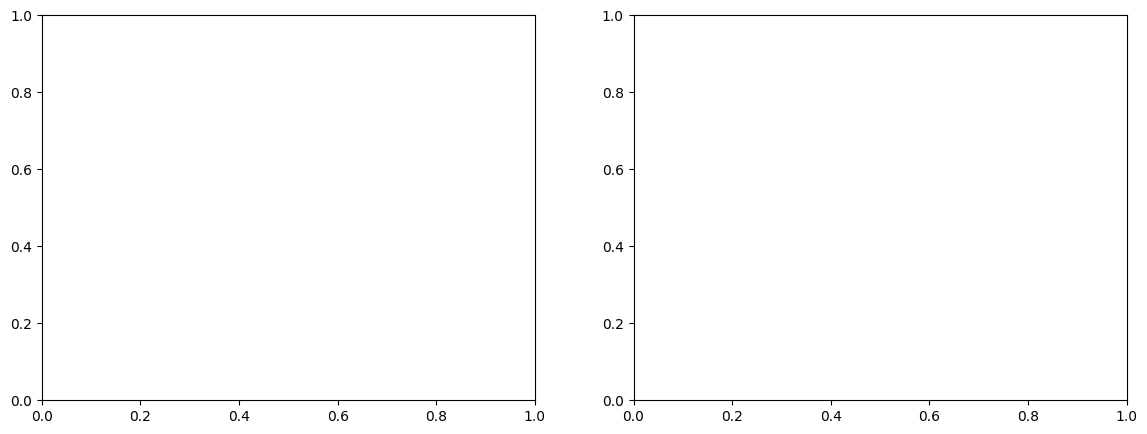

In [ ]:
# Per-patient BG statistics - scatter plot visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

patient_ids = list(loader.processed_data.keys())

# Determine which BG column to use
bg_col = "bg_mM" if "bg_mM" in loader.get_combined_data().columns else "bg_mg_dl"
bg_unit = "mM" if bg_col == "bg_mM" else "mg/dL"

# Calculate per-patient statistics
patient_stats = []
for pid in patient_ids:
    df = loader.processed_data[pid]
    if bg_col in df.columns:
        bg = df[bg_col].dropna()
        if len(bg) > 0:
            patient_stats.append(
                {
                    "pid": pid,
                    "mean": bg.mean(),
                    "std": bg.std(),
                    "min": bg.min(),
                    "max": bg.max(),
                    "count": len(bg),
                }
            )

# Plot 1: Mean vs Std scatter (bubble size = data count)
ax1 = axes[0]
means = [s["mean"] for s in patient_stats]
stds = [s["std"] for s in patient_stats]
counts = [s["count"] for s in patient_stats]

# Normalize counts for bubble size
size_scale = np.array(counts) / max(counts) * 200 + 20

scatter = ax1.scatter(
    means,
    stds,
    s=size_scale,
    c=counts,
    cmap="plasma",
    alpha=0.6,
    edgecolors="black",
    linewidth=0.5,
)
ax1.set_xlabel(f"Mean Blood Glucose ({bg_unit})")
ax1.set_ylabel(f"Std Dev Blood Glucose ({bg_unit})")
ax1.set_title("Patient BG Variability (bubble size = data points)")
cbar = plt.colorbar(scatter, ax=ax1)
cbar.set_label("Data Points")

# Add overall mean lines
ax1.axvline(
    x=np.mean(means),
    color="red",
    linestyle="--",
    alpha=0.7,
    label=f"Mean of means: {np.mean(means):.2f}",
)
ax1.axhline(
    y=np.mean(stds),
    color="blue",
    linestyle="--",
    alpha=0.7,
    label=f"Mean of stds: {np.mean(stds):.2f}",
)
ax1.legend(fontsize=8)

# Plot 2: Min-Max range scatter
ax2 = axes[1]
mins = [s["min"] for s in patient_stats]
maxs = [s["max"] for s in patient_stats]
ranges = [s["max"] - s["min"] for s in patient_stats]

scatter2 = ax2.scatter(
    mins,
    maxs,
    s=50,
    c=ranges,
    cmap="RdYlGn_r",
    alpha=0.7,
    edgecolors="black",
    linewidth=0.5,
)
ax2.plot(
    [min(mins), max(maxs)],
    [min(mins), max(maxs)],
    "k--",
    alpha=0.3,
    label="Min=Max line",
)
ax2.set_xlabel(f"Minimum BG ({bg_unit})")
ax2.set_ylabel(f"Maximum BG ({bg_unit})")
ax2.set_title("Patient BG Range (color = range size)")
cbar2 = plt.colorbar(scatter2, ax=ax2)
cbar2.set_label(f"Range ({bg_unit})")

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"\nSummary across {len(patient_stats)} patients:")
print(f"  Mean BG: {np.mean(means):.2f} ± {np.std(means):.2f} {bg_unit}")
print(f"  Mean Std Dev: {np.mean(stds):.2f} ± {np.std(stds):.2f} {bg_unit}")
print(f"  Mean Range: {np.mean(ranges):.2f} {bg_unit}")

### 6.3 Time-in-Range Analysis

NameError: name 'bg_col' is not defined

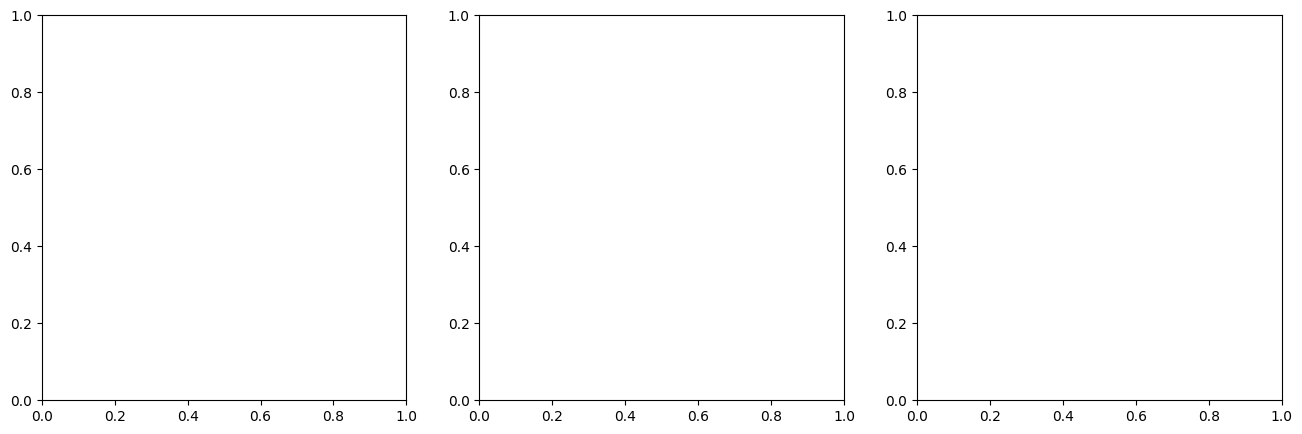

In [ ]:
# Time-in-Range Analysis - scatter and distribution plots
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Define thresholds based on unit
if bg_col == "bg_mM":
    target_low, target_high = 3.9, 10.0
else:
    target_low, target_high = 70, 180

# Calculate time-in-range for each patient
tir_stats = []
for pid in patient_ids:
    df = loader.processed_data[pid]
    if bg_col in df.columns:
        bg = df[bg_col].dropna()
        total = len(bg)
        if total > 0:
            below = (bg < target_low).sum() / total * 100
            above = (bg > target_high).sum() / total * 100
            in_range = 100 - below - above
            tir_stats.append(
                {
                    "pid": pid,
                    "below": below,
                    "in_range": in_range,
                    "above": above,
                    "count": total,
                }
            )

below_pcts = [s["below"] for s in tir_stats]
in_range_pcts = [s["in_range"] for s in tir_stats]
above_pcts = [s["above"] for s in tir_stats]
counts = [s["count"] for s in tir_stats]

# Plot 1: Scatter - Time in Range vs Time Below (hypo risk visualization)
ax1 = axes[0]
scatter1 = ax1.scatter(
    in_range_pcts,
    below_pcts,
    s=60,
    c=above_pcts,
    cmap="YlOrRd",
    alpha=0.7,
    edgecolors="black",
    linewidth=0.5,
)
ax1.set_xlabel("Time in Range (%)")
ax1.set_ylabel("Time Below Range - Hypo (%)")
ax1.set_title("Glycemic Control: TIR vs Hypoglycemia")
cbar1 = plt.colorbar(scatter1, ax=ax1)
cbar1.set_label("Time Above Range (%)")
ax1.axhline(y=4, color="red", linestyle="--", alpha=0.5, label="4% hypo threshold")
ax1.axvline(x=70, color="green", linestyle="--", alpha=0.5, label="70% TIR target")
ax1.legend(fontsize=8)

# Plot 2: Distribution of Time-in-Range (histogram)
ax2 = axes[1]
ax2.hist(
    in_range_pcts,
    bins=20,
    color="#2ECC71",
    edgecolor="black",
    alpha=0.7,
    label="In Range",
)
ax2.axvline(
    x=np.mean(in_range_pcts),
    color="red",
    linestyle="--",
    linewidth=2,
    label=f"Mean: {np.mean(in_range_pcts):.1f}%",
)
ax2.axvline(
    x=np.median(in_range_pcts),
    color="blue",
    linestyle=":",
    linewidth=2,
    label=f"Median: {np.median(in_range_pcts):.1f}%",
)
ax2.axvline(
    x=70, color="green", linestyle="-", linewidth=2, alpha=0.5, label="70% Target"
)
ax2.set_xlabel("Time in Range (%)")
ax2.set_ylabel("Number of Patients")
ax2.set_title(f"Time-in-Range Distribution (n={len(tir_stats)})")
ax2.legend(fontsize=8)

# Plot 3: Overall cohort pie chart
ax3 = axes[2]
combined_bg = loader.get_combined_data()[bg_col].dropna()
total = len(combined_bg)

if total > 0:
    overall_below = (combined_bg < target_low).sum() / total * 100
    overall_above = (combined_bg > target_high).sum() / total * 100
    overall_in_range = 100 - overall_below - overall_above

    sizes = [overall_below, overall_in_range, overall_above]
    labels = [
        f"Below\n{overall_below:.1f}%",
        f"In Range\n{overall_in_range:.1f}%",
        f"Above\n{overall_above:.1f}%",
    ]
    colors = ["#E74C3C", "#2ECC71", "#F39C12"]
    explode = (0.02, 0.05, 0.02)

    wedges, texts = ax3.pie(
        sizes,
        labels=labels,
        colors=colors,
        explode=explode,
        startangle=90,
        textprops={"fontsize": 10, "fontweight": "bold"},
    )
    ax3.set_title(f"Overall Time-in-Range\n(n={total:,} readings)")

plt.tight_layout()
plt.show()

# Print TIR summary
print(f"\nTime-in-Range Summary ({len(tir_stats)} patients):")
print(f"  Mean TIR: {np.mean(in_range_pcts):.1f}% (target: >70%)")
print(f"  Mean Time Below: {np.mean(below_pcts):.1f}% (target: <4%)")
print(f"  Mean Time Above: {np.mean(above_pcts):.1f}% (target: <25%)")
print(
    f"  Patients meeting 70% TIR: {sum(1 for t in in_range_pcts if t >= 70)}/{len(tir_stats)}"
)

## 7. Sample Data Inspection

Quick look at the actual data content for one patient.

In [ ]:
sample_patient_id = loader.patient_ids[0]
sample_df = loader.get_patient_data(sample_patient_id)

print(f"Sample data for patient '{sample_patient_id}':")
print("\nFirst 5 rows:")
display(sample_df.head())

print("\nLast 5 rows:")
display(sample_df.tail())

print("\nData types:")
print(sample_df.dtypes)

AttributeError: 'AleppoDataLoader' object has no attribute 'patient_ids'

In [ ]:
# Basic statistics for numeric columns
print(f"\nDescriptive statistics for patient '{sample_patient_id}':")
display(sample_df.describe())

NameError: name 'sample_patient_id' is not defined

## 8. Validation Summary

Final checks to confirm the data loader is working correctly.

In [ ]:
print("=" * 60)
print("VALIDATION SUMMARY")
print("=" * 60)

checks = [
    ("dataset_name property", loader.dataset_name is not None),
    ("num_patients property", loader.num_patients > 0),
    ("patient_ids property", len(loader.patient_ids) > 0),
    (
        "processed_data populated",
        loader.processed_data is not None and len(loader.processed_data) > 0,
    ),
    (
        "train_data populated",
        loader.train_data is not None and len(loader.train_data) > 0,
    ),
    (
        "validation_data populated",
        loader.validation_data is not None and len(loader.validation_data) > 0,
    ),
    (
        "get_patient_data() works",
        loader.get_patient_data(loader.patient_ids[0]) is not None,
    ),
    ("get_combined_data() works", not loader.get_combined_data().empty),
]

all_passed = True
for check_name, passed in checks:
    status = "✅ PASS" if passed else "❌ FAIL"
    print(f"  {status}: {check_name}")
    if not passed:
        all_passed = False

print("=" * 60)
if all_passed:
    print("All validation checks PASSED!")
else:
    print("Some validation checks FAILED. Please review.")

VALIDATION SUMMARY


AttributeError: 'AleppoDataLoader' object has no attribute 'num_patients'